# SelectKBest 單變數特徵選取(Univariate feature selection)

## 載入相關套件

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## 載入資料集

In [26]:
X, y = datasets.load_iris(return_X_y=True)
X.shape

(150, 4)

## SelectKBest 特徵選取

In [27]:
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [28]:
# 顯示特徵分數
clf.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [29]:
# 顯示 p value
clf.pvalues_

array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])

In [30]:
# 顯示特徵名稱
import numpy as np
ds = datasets.load_iris()
np.array(ds.feature_names)[clf.scores_.argsort()[-2:][::-1]]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [31]:
# 另一種寫法
import pandas as pd
X = pd.DataFrame(ds.data, columns=ds.feature_names)
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
clf.get_feature_names_out()

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

## 3. 不須進行特徵工程

## 4. 資料分割

In [32]:
# 選擇2個特徵
X = X[clf.get_feature_names_out()].values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

## 特徵縮放

In [33]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [35]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [36]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 2])

In [37]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

93.33%


In [38]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]


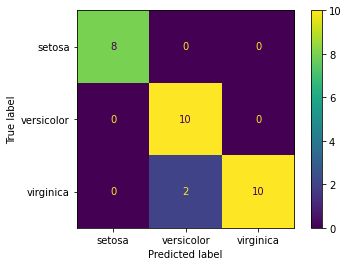

In [39]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 使用全部特徵

In [3]:
# 載入資料集
X, y = datasets.load_iris(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

(120, 4) (30, 4) (120,) (30,)
96.67%
